In [1]:
%matplotlib inline

import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.stats import pearsonr

from scipy.cluster.hierarchy import linkage
import scipy.spatial.distance as ssd

import seaborn as sns
import sys
from scipy.sparse import hstack, csr_matrix
from sklearn.feature_selection import mutual_info_classif
import os
from cnmf import cNMF

sys.path.append('../../Code/')
from utils import read_dataset_log, starcat

In [2]:
from matplotlib import rcParams, font_manager

rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
#rcParams['text.usetex'] = True

In [3]:
params = read_dataset_log('Dataset Paths')
params.index = params['dataset']
params = params[params['dataset_type']=='discovery']
params

,dataset,usage_fn,gene_scores_fn,gene_tpm_fn,tcat_fn,tcat_fn_withsingletons,manual_gating_fn,manual_activation_gating_fn,activation_score_fn,metadata_fn,...,cnmf_dir,k,dt,processed_forcnmf_fn,tpm_counts_for_cnmf_fn,raw_counts_filt_fn,raw_counts_fn,dataset_type,tissue_type,context_label
dataset,,,,,,,,,,,,,,,,,,,,,
AMP-RA,AMP-RA,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMPRA....,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Manual...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/Activa...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,...,/data/srlab1/TCAT/Data/PerDataset/AMPRA,34.0,0_15,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,/data/srlab1/TCAT/Data/PerDataset/AMPRA/AMP_AD...,discovery,Synovium,RA+OA
Pan-Cancer,Pan-Cancer,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Pa...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/Ac...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,...,/data/srlab1/TCAT/Data/PerDataset/Pancancer,38.0,0.15,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,NaN,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,/data/srlab1/TCAT/Data/PerDataset/Pancancer/pa...,discovery,Pan-Tissue,Cancer+Healthy
TBRU,TBRU,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/PerDataset/TBRU/TBRU.20...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,NaN,/data/srlab1/TCAT/Data/PerDataset/TBRU/ManualG...,/data/srlab1/TCAT/Data/PerDataset/TBRU/Activat...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,...,/data/srlab1/TCAT/Data/PerDataset/TBRU,36.0,0_20,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,/data/srlab1/TCAT/Data/PerDataset/TBRU/tbru_ex...,discovery,Blood,Healthy
HIV-Vaccine,HIV-Vaccine,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/HIVV...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Manu...,NaN,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/Acti...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl,31.0,0_15,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoe...,discovery,Blood,Post-Vaccine+Healthy
UK-Covid,UK-Covid,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/UKCO...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Manu...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/Acti...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID,44.0,0_20,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,NaN,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,/data/srlab1/TCAT/Data/PerDataset/UKCOVID/hani...,discovery,Blood,Covid-19+Healthy
COMBAT,COMBAT,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBA...,/data/srlab1/TCAT/Data/TCAT/TCAT_Usage.2023101...,/data/srlab1/TCAT/Data

In [4]:
metagep_params = read_dataset_log('cGEP Paths').iloc[0,:]
metagep_params

clustering_fn                                /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
clustering_with_singletons_fn                /data/srlab1/TCAT/Data/TCAT/cluster_groups.pai...
merged_hvgs                                  /data/srlab1/TCAT/Data/TCAT/MergedHVG_UnionAll...
tpm_varnorm_spectra                          /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_varnorm_spectra_withsingletons           /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_renorm_varnorm_spectra                   /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
tpm_renorm_varnorm_spectra_withsingletons    /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
scores_spectra                               /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
scores_spectra_withsingletons                /data/srlab1/TCAT/Data/TCAT/merged_spectra.Gen...
correlation_matrix_tpm_renorm_varnorm        /data/srlab1/TCAT/Data/TCAT/R.TPMrenorm.VarNor...
correlation_matrix_spectra                   /data

In [5]:
cgep_info = read_dataset_log('cGEP_Name')
cgep_info.index = cgep_info['cGep_Name']
cgep_info.head()

,cGep_Name,Old_Short_Name,Long_Name,Short_Name,Shortest_Name,Class,Num_Datasets,Notes,Reviewed,Filter
cGep_Name,,,,,,,,,,
COMBAT_Cytoskeleton,COMBAT_Cytoskeleton,Cytoskeleton,Actin Cytoskeleton,Cytoskeleton,Cytosk.,Functional,7.0,NaN,Y,NaN
CD8_EM,CD8_EM,CD8-EM,CD8 Effector Memory,CD8-EM,CD8-EM,Lineage,7.0,Need to confirm overlap with gating since the ...,Y,NaN
CellCycle-G2M,CellCycle-G2M,CellCycle-G2M,Cell Cycle G2M Phase,CellCycle-G2M,G2M-phase,Functional,7.0,NaN,Y,NaN
CellCycle-S,CellCycle-S,CellCycle-S,Cell Cycle S Phase,CellCycle-S,S-phase,Functional,7.0,NaN,Y,NaN
Cytotoxic,Cytotoxic,Cytotoxic,Cytotoxic,Cytotoxic,Cytotoxic,Functional,7.0,NaN,Y,NaN


In [6]:
rename_map = dict(zip(cgep_info['cGep_Name'], cgep_info['Short_Name']))

In [7]:
ref = pd.read_csv(metagep_params['tpm_renorm_varnorm_spectra'], sep='\t', index_col=0).rename(index=rename_map)
hvgs = pd.read_csv(metagep_params['merged_hvgs'], sep='\t', header=None)[0]
ref = ref[hvgs]
ref.iloc[:5,:5]

,A1BG,AARD,AARSD1,ABCA1,ABCB1
CellCycle-G2M,2.032614,22.965553,17.423538,3.478179,2.297279
Translation,35.445284,0.000000,9.245894,0.477994,0.000000
HLA,18.192998,14.632671,2.686475,3.937182,0.000000
ISG,0.436212,0.000000,18.078198,17.354505,0.000000
Mito,10.293049,0.000000,52.669894,14.615502,3.341488


In [8]:
pbmc_fns = {
'UK-Covid' : '/data/srlab1/TCAT/Data/PerDataset/UKCOVID/haniffa21.AllPBMCs.raw.h5ad',
'COMBAT' : '/data/srlab1/TCAT/Data/PerDataset/COMBAT/COMBAT-CITESeq-DATA.PBMC.Raw.h5ad',
'HIV-Vaccine' : '/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/haoetal_pbmc_multimodal.merged.raw.h5ad'
}

In [9]:
usage_all = {}
meta_all = {}
#for dataset in ['AMP-RA', 'Pan-Cancer', 'TBRU', 'HIV-Vaccine', 'UK-Covid', 'COMBAT', 'Pan-Tissue']:
for dataset in [ 'UK-Covid', 'COMBAT', 'HIV-Vaccine']:
    dirname = os.path.dirname(pbmc_fns[dataset])
    outpath = os.path.join(dirname, 'TCAT_Usage.FullPBMC.20240209.tsv')
    adata = sc.read(pbmc_fns[dataset])
    tmod = starcat(alpha=0, l1_ratio=0, tpm_norm=False, var_norm=True, copy=True)
    usage_all[dataset] = tmod.fit_transform(adata, ref_spectra=ref)
    meta_all[dataset] = adata.obs.copy()
    print(outpath)
    usage_all[dataset].to_csv(outpath, sep='\t')

Only considering the two last: ['.raw', '.h5ad'].
Only considering the two last: ['.raw', '.h5ad'].
3412 out of 3412 genes in the reference overlap with the query


/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:843: FutureWarning: X.dtype being converted to np.float32 from int32. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  view_to_actual(adata)


/data/srlab1/TCAT/Data/PerDataset/UKCOVID/TCAT_Usage.FullPBMC.20240209.tsv
Only considering the two last: ['.Raw', '.h5ad'].
Only considering the two last: ['.Raw', '.h5ad'].
3412 out of 3412 genes in the reference overlap with the query


/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/data/srlab1/TCAT/Data/PerDataset/COMBAT/TCAT_Usage.FullPBMC.20240209.tsv
Only considering the two last: ['.raw', '.h5ad'].
Only considering the two last: ['.raw', '.h5ad'].
3412 out of 3412 genes in the reference overlap with the query


/PHShome/dk718/miniforge3/envs/cnmf_env2v3/lib/python3.7/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/data/srlab1/TCAT/Data/PerDataset/HaoEtAl/TCAT_Usage.FullPBMC.20240209.tsv


## Combat

In [10]:
allrs= []

In [11]:
dataset = 'COMBAT'
usage = usage_all[dataset].copy()
usage = usage.div(usage.sum(axis=1), axis=0)
meta = meta_all[dataset].copy()

sample_col = params.loc[dataset, 'sample_col']
individual_col = params.loc[dataset, 'individual_col']

## For individuals with multiple samples, filter the sample with fewer cells
ct = pd.crosstab(meta[individual_col], meta[sample_col])
display((ct>0).sum(axis=1).value_counts())
ind = (ct>0).sum(axis=1)>1
ct = ct.loc[ind, :]
tokeep = ct.loc[:, (ct>0).sum(axis=0)>0].idxmax(axis=1)
tofilt = meta[individual_col].isin(tokeep.index) & ~meta[sample_col].isin(tokeep.values)
meta = meta.loc[~tofilt, :]
usage = usage.loc[~tofilt, :]

ct = pd.crosstab(meta[individual_col], meta[sample_col])
(ct>0).sum(axis=1).value_counts()

1    111
2     10
3      3
dtype: int64

1    124
dtype: int64

In [12]:
mapping = {'COVID_SEV':1, 'Sepsis':np.nan, 'COVID_MILD':1, 'COVID_HCW_MILD':1, 'HV':0,
       'COVID_CRIT':1, 'COVID_LDN':1, 'Flu':np.nan}

meta['COVID_vs_Healthy'] = meta['Source'].replace(mapping)

mapping = {'COVID_SEV':0, 'Sepsis':np.nan, 'COVID_MILD':0, 'COVID_HCW_MILD':0, 'HV':np.nan,
       'COVID_CRIT':1, 'COVID_LDN':1, 'Flu':np.nan}
meta['COVID_Severe_vs_Mild'] = meta['Source'].replace(mapping)


In [14]:
X = pd.merge(left=meta, right=usage[['IEG', 'IEG2', 'IEG3']], left_index=True, right_index=True, how='inner')
X['IEG_Sum'] = X[['IEG', 'IEG2', 'IEG3']].sum(axis=1)

In [15]:
X['Cell_Type'] = X['Annotation_major_subset'].replace({'CD4':'T', 'CD8':'T', 'cMono':'Mono/DC', 'ncMono':'Mono/DC', 'MAIT':'T', 'GDT':'T', 'DC':'Mono/DC'})

In [16]:
X['Annotation_major_subset'].value_counts()

CD4       247438
cMono     192405
CD8        95665
NK         62439
nan        47114
B          38796
ncMono     31039
GDT         8568
DC          8424
PB          7446
DP          6122
MAIT        4186
DN          3970
HSC         1752
PLT         1409
iNKT         346
RET          291
Mast          65
Name: Annotation_major_subset, dtype: int64

In [18]:
sub = X.groupby([sample_col, 'COVID_vs_Healthy', 'Cell_Type', 'Annotation_cell_type', 'Institute', 'Pool_ID', ])[['IEG', 'IEG2', 'IEG3', 'IEG_Sum']].mean().reset_index().dropna()
sub_pivot = sub.pivot_table(index='COMBAT_participant_timepoint_ID', columns='Cell_Type', values='IEG_Sum')
sub_pivot

Cell_Type,B,DN,DP,HSC,Mast,Mono/DC,NK,PB,PLT,RET,T,iNKT,nan
COMBAT_participant_timepoint_ID,,,,,,,,,,,,,
G05061-Ja005,0.193379,0.127225,0.087215,0.027329,NaN,0.118811,0.147854,0.027501,7.883220e-10,1.294755e-08,0.114370,0.340939,0.163276
G05064-Ja005,0.196724,0.120247,0.096423,0.052337,NaN,0.162020,0.105477,0.042157,NaN,NaN,0.095098,NaN,0.179311
G05073-Ja005,0.115710,0.072790,0.122374,0.020791,0.000825,0.158564,0.097866,0.064462,6.068118e-10,NaN,0.134774,0.261155,0.152838
G05077-Ja005,0.141486,0.081367,0.117979,0.032846,0.046335,0.154908,0.100089,0.028368,1.177164e-07,1.180685e-01,0.122384,0.277031,0.170084
G05078-Ja005,0.160809,0.162839,0.133626,0.032056,0.009395,0.157013,0.093474,0.017934,1.924257e-08,NaN,0.132887,0.230736,0.157587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
S00134-Ja003,0.038713,0.023546,0.020552,0.032506,NaN,0.119253,0.004980,0.016845,1.289535e-02,1.113754e-07,0.021853,NaN,0.051122
S00142-Ja005,0.094316,0.038708,0.041647,0.012698,NaN,0.097112,0.025916,0.015609,5.311172e-03,NaN,0.038386,0.058089,0.090007
S00148-Ja003,0.048359,0.013889,0.015840,0.025733,NaN,0.101624,0.003208,0.021931,3.911148e-07,5.281769e-03,0.016733,NaN,0.029069


In [19]:
from scipy.stats import pearsonr 

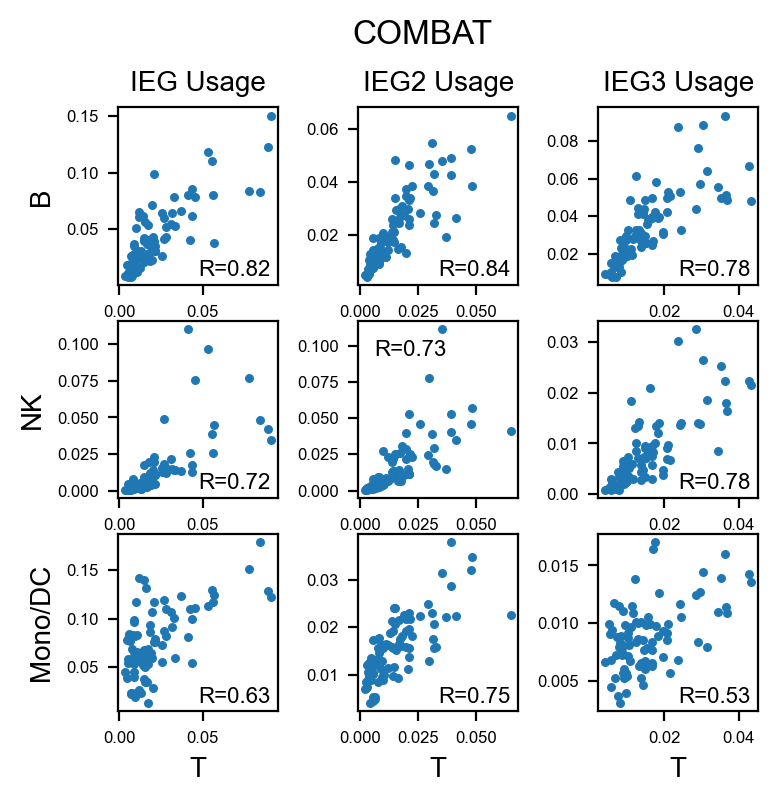

In [20]:
fig,axes = plt.subplots(3, 3, figsize=(4,4), dpi=200, gridspec_kw={'wspace':.5, 'right':.95, 'left':.15})
for i,g in enumerate(['IEG', 'IEG2', 'IEG3']):
    sub_pivot = sub.pivot_table(index='COMBAT_participant_timepoint_ID', columns='Cell_Type', values=g)
    for j,lin in enumerate(['B', 'NK', 'Mono/DC']):
        ind = ~sub_pivot[lin].isnull() & ~sub_pivot['T'].isnull()
        
        R,P = pearsonr(sub_pivot.loc[ind,lin], sub_pivot.loc[ind, 'T'])
        axes[j,i].scatter(sub_pivot.loc[ind, 'T'], sub_pivot.loc[ind, lin], s=5)
        #if j != 2:
        #    axes[j,i].text(.05, .9, 'R=%.2f' % R, transform=axes[j,i].transAxes, fontsize=8)
        #else:
        
        if (i == 1) and (j==1):
            axes[j,i].text(.1, .8, 'R=%.2f' % R, transform=axes[j,i].transAxes, fontsize=8)            
        else:
            axes[j,i].text(.5, .05, 'R=%.2f' % R, transform=axes[j,i].transAxes, fontsize=8)
    
        if i == 0:
            axes[j,i].set_ylabel(lin.replace('MNP', 'Myeloid'), fontsize=10)
            
        if j == 0:
            axes[j,i].set_title(g.replace('YPEL5/JUNB', 'IEG3') + ' Usage', fontsize=10)
            
        if j == 2:
            axes[j,i].set_xlabel('T', fontsize=10)
    
        ax = axes[j,i]
        ax.tick_params(axis='both', labelsize=6, )
        allrs.append([dataset, g, lin, R, P])
        
plt.figtext(.53, .97, dataset, fontsize=12, ha='center', va='center')

        
plt.savefig('../../Figures/Components/IEG_CrossSampleCorrelation_Scatter_COMBAT.png')
plt.savefig('../../Figures/Components/IEG_CrossSampleCorrelation_Scatter_COMBAT.pdf')

## UK-Covid

In [21]:
dataset = 'UK-Covid'
usage = usage_all[dataset].copy()
usage = usage.div(usage.sum(axis=1), axis=0)
meta = meta_all[dataset].copy()

sample_col = params.loc[dataset, 'sample_col']
individual_col = params.loc[dataset, 'individual_col']

## For individuals with multiple samples, filter the sample with fewer cells
ct = pd.crosstab(meta[individual_col], meta[sample_col])
display((ct>0).sum(axis=1).value_counts())
ind = (ct>0).sum(axis=1)>1
ct = ct.loc[ind, :]
tokeep = ct.loc[:, (ct>0).sum(axis=0)>0].idxmax(axis=1)
tofilt = meta[individual_col].isin(tokeep.index) & ~meta[sample_col].isin(tokeep.values)
meta = meta.loc[~tofilt, :]
usage = usage.loc[~tofilt, :]

ct = pd.crosstab(meta[individual_col], meta[sample_col])
(ct>0).sum(axis=1).value_counts()

1    117
2     13
dtype: int64

1    130
dtype: int64

In [22]:
pcol = 'Status_on_day_collection_summary'
mapping = {'Moderate':1, 'Healthy':0, 'Severe':1, 'Mild':1, 'Critical':1, 'Asymptomatic':np.nan, 'Non_covid':np.nan, 'LPS_90mins':np.nan, 'LPS_10hours':np.nan}
meta['COVID_vs_Healthy'] = meta[pcol].map(mapping)
pd.crosstab(meta[pcol].replace(np.nan, 'null'), meta['COVID_vs_Healthy'].replace(np.nan, 'null'))

pcol = 'Status_on_day_collection_summary'
mapping = {'Moderate':0, 'Healthy':np.nan, 'Severe':0, 'Mild':0, 'Critical':1, 'Asymptomatic':np.nan, 'Non_covid':np.nan, 'LPS_90mins':np.nan, 'LPS_10hours':np.nan}
meta['COVID_Severe_vs_Mild'] = meta[pcol].map(mapping)
pd.crosstab(meta[pcol].replace(np.nan, 'null'), meta['COVID_Severe_vs_Mild'].replace(np.nan, 'null'))


COVID_Severe_vs_Mild,0.0,1.0,null
Status_on_day_collection_summary,,,
Asymptomatic,0,0,28759
Critical,0,78946,0
Healthy,0,0,95754
LPS_10hours,0,0,3885
LPS_90mins,0,0,3999
Mild,131240,0,0
Moderate,196756,0,0
Non_covid,0,0,15157
Severe,76564,0,0


In [23]:
X = pd.merge(left=meta, right=usage[['IEG', 'IEG2', 'IEG3']], left_index=True, right_index=True, how='inner')
X['IEG_Sum'] = X[['IEG', 'IEG2', 'IEG3']].sum(axis=1)

In [24]:
list(X['initial_clustering'].unique())

['CD8',
 'CD4',
 'CD14',
 'B_cell',
 'NK_16hi',
 'Lymph_prolif',
 'Treg',
 'MAIT',
 'Plasmablast',
 'NK_56hi',
 'CD16',
 'Platelets',
 'DCs',
 'gdT',
 'HSC',
 'pDC',
 'RBC',
 'Mono_prolif']

In [25]:
X['Cell_Type'] = X['initial_clustering'].replace({'CD4':'T', 'CD14':'Mono/DC', 'CD8':'T', 'NK_16hi':'NK', 'B_cell':'B', 'CD16':'Mono/DC', 'MAIT':'T', 'DCs':'Mono/DC', 'gdT':'T'})

In [26]:
sub = X.groupby([sample_col, 'COVID_vs_Healthy', 'Site', 'Cell_Type'])[['IEG', 'IEG2', 'IEG3', 'IEG_Sum']].mean().reset_index().dropna()
sub_pivot = sub.pivot_table(index=sample_col, columns='Cell_Type', values='IEG_Sum')
sub_pivot

Cell_Type,B,HSC,Lymph_prolif,Mono/DC,Mono_prolif,NK,NK_56hi,Plasmablast,Platelets,RBC,T,Treg,pDC
sample_id,,,,,,,,,,,,,
AP1,0.077668,0.033578,0.024281,0.083314,NaN,0.017933,0.074803,0.016878,0.071190,0.069382,0.076489,0.067023,0.049085
AP2,0.048204,0.038737,0.012082,0.042326,NaN,0.012924,0.048424,0.006399,0.012247,0.031684,0.101996,0.081083,NaN
AP3,0.015674,0.001926,0.001539,0.001844,NaN,0.001621,0.003302,0.007204,0.000906,0.002253,0.005256,0.002518,0.004538
AP4,0.126518,0.066381,0.029890,0.066221,NaN,0.037452,0.072946,0.046560,0.094368,0.171431,0.115953,0.100903,0.032510
AP5,0.081592,0.032236,0.003374,0.015409,0.011959,0.005868,0.021827,0.015240,0.019646,0.042560,0.029902,0.030389,0.018786
...,...,...,...,...,...,...,...,...,...,...,...,...,...
newcastle21v2,0.061630,0.008555,0.008764,0.058674,NaN,0.033283,0.061052,0.008117,0.001021,NaN,0.065057,0.041208,0.052338
newcastle49,0.139094,0.023122,0.011884,0.011475,0.004714,0.036212,0.090229,0.005215,0.001852,0.007235,0.035058,0.017364,0.040355
newcastle59,0.083333,0.009665,0.010814,0.027551,0.000769,0.007393,0.031124,0.003974,0.000836,0.017363,0.030798,0.020420,0.062872


In [27]:
from scipy.stats import pearsonr 

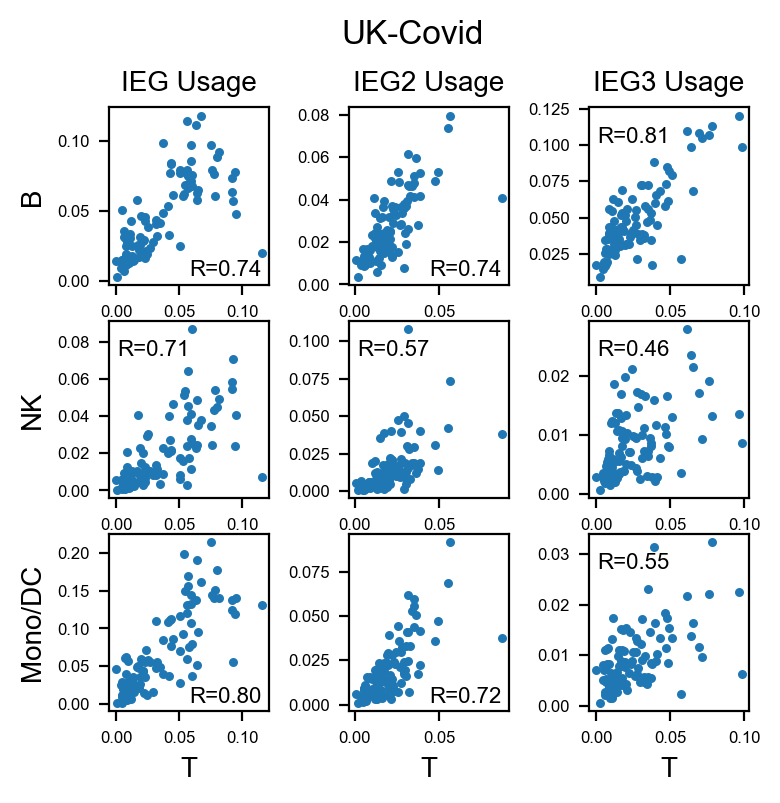

In [28]:
fig,axes = plt.subplots(3, 3, figsize=(4,4), dpi=200, gridspec_kw={'wspace':.5, 'right':.95, 'left':.15})
for i,g in enumerate(['IEG', 'IEG2', 'IEG3']):
    sub_pivot = sub.pivot_table(index=sample_col, columns='Cell_Type', values=g)
    for j,lin in enumerate(['B', 'NK', 'Mono/DC']):
        ind = ~sub_pivot[lin].isnull() & ~sub_pivot['T'].isnull()
        
        R,P = pearsonr(sub_pivot.loc[ind,lin], sub_pivot.loc[ind, 'T'])
        axes[j,i].scatter(sub_pivot.loc[ind, 'T'], sub_pivot.loc[ind, lin], s=5)
        if ((i == 2) and (j==0)) or ((j==1)) or ((i == 2) and (j==2)):
            axes[j,i].text(.05, .8, 'R=%.2f' % R, transform=axes[j,i].transAxes, fontsize=8)       
        else:
            axes[j,i].text(.5, .05, 'R=%.2f' % R, transform=axes[j,i].transAxes, fontsize=8)
    
        if i == 0:
            axes[j,i].set_ylabel(lin.replace('MNP', 'Myeloid'), fontsize=10)
            
        if j == 0:
            axes[j,i].set_title(g.replace('YPEL5/JUNB', 'IEG3') + ' Usage', fontsize=10)
            
        if j == 2:
            axes[j,i].set_xlabel('T', fontsize=10)
    
        ax = axes[j,i]
        ax.tick_params(axis='both', labelsize=6, )
        allrs.append([dataset, g, lin, R, P])
        
plt.figtext(.53, .97, dataset, fontsize=12, ha='center', va='center')

        
plt.savefig('../../Figures/Components/IEG_CrossSampleCorrelation_Scatter_UKCovid.png')
plt.savefig('../../Figures/Components/IEG_CrossSampleCorrelation_Scatter_UKCovid.pdf')

## HIV-Vaccine

In [29]:
dataset = 'HIV-Vaccine'
usage = usage_all[dataset].copy()
usage = usage.div(usage.sum(axis=1), axis=0)
meta = meta_all[dataset].copy()

sample_col = params.loc[dataset, 'sample_col']
individual_col = params.loc[dataset, 'individual_col']

## For individuals with multiple samples, filter the sample with fewer cells
ct = pd.crosstab(meta[individual_col], meta[sample_col])
display((ct>0).sum(axis=1).value_counts())
ind = (ct>0).sum(axis=1)>1
ct = ct.loc[ind, :]
tokeep = ct.loc[:, (ct>0).sum(axis=0)>0].idxmax(axis=1)
tofilt = meta[individual_col].isin(tokeep.index) & ~meta[sample_col].isin(tokeep.values)
meta = meta.loc[~tofilt, :]
usage = usage.loc[~tofilt, :]

ct = pd.crosstab(meta[individual_col], meta[sample_col])
(ct>0).sum(axis=1).value_counts()

3    8
dtype: int64

1    8
dtype: int64

In [30]:
X = pd.merge(left=meta, right=usage[['IEG', 'IEG2', 'IEG3']], left_index=True, right_index=True, how='inner')
X['IEG_Sum'] = X[['IEG', 'IEG2', 'IEG3']].sum(axis=1)

In [31]:
X['celltype.l1'].value_counts()

Mono       16659
CD4 T      14120
CD8 T       9267
NK          7156
B           4756
other T     2396
DC          1340
other       1272
Name: celltype.l1, dtype: int64

In [32]:
X['Cell_Type'] = X['celltype.l1'].replace({'CD4 T':'T', 'Mono':'Mono/DC', 'CD8 T':'T',  'B_cell':'B', 'DC':'Mono/DC', 'other T':'T'})
X['Cell_Type'].value_counts()

T          25783
Mono/DC    17999
NK          7156
B           4756
other       1272
Name: Cell_Type, dtype: int64

In [33]:
sub = X.groupby([sample_col, 'Cell_Type'])[['IEG', 'IEG2', 'IEG3', 'IEG_Sum']].mean().reset_index().dropna()
sub_pivot = sub.pivot_table(index=sample_col, columns='Cell_Type', values='IEG_Sum')
sub_pivot

Cell_Type,B,Mono/DC,NK,T,other
orig.ident,,,,,
P1_0,0.019167,0.013390,0.006369,0.010284,0.006839
P2_0,0.038075,0.056802,0.020908,0.022661,0.026821
P3_3,0.090191,0.139092,0.049120,0.073392,0.052566
P4_7,0.065624,0.081111,0.020166,0.034899,0.030533
P5_7,0.030046,0.056592,0.010429,0.016365,0.018775
P6_3,0.048226,0.054677,0.021109,0.041389,0.023610
P7_0,0.095380,0.106321,0.074750,0.080795,0.049693
P8_3,0.016949,0.022542,0.004178,0.010855,0.016104


In [34]:
from scipy.stats import pearsonr 

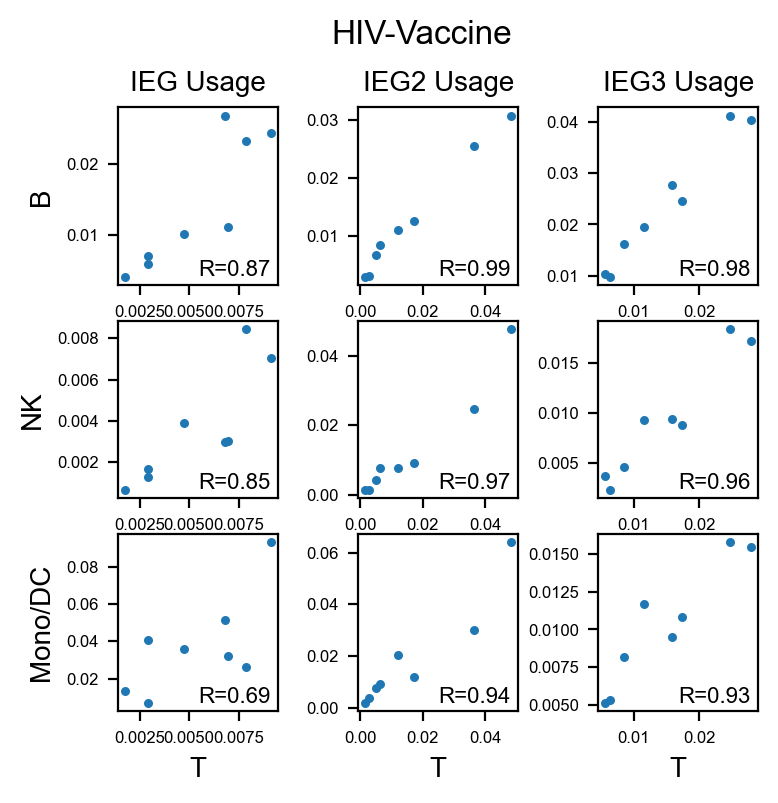

In [35]:
fig,axes = plt.subplots(3, 3, figsize=(4,4), dpi=200, gridspec_kw={'wspace':.5, 'right':.95, 'left':.15})
for i,g in enumerate(['IEG', 'IEG2', 'IEG3']):
    sub_pivot = sub.pivot_table(index=sample_col, columns='Cell_Type', values=g)
    for j,lin in enumerate(['B', 'NK', 'Mono/DC']):
        ind = ~sub_pivot[lin].isnull() & ~sub_pivot['T'].isnull()
        
        R,P = pearsonr(sub_pivot.loc[ind,lin], sub_pivot.loc[ind, 'T'])
        axes[j,i].scatter(sub_pivot.loc[ind, 'T'], sub_pivot.loc[ind, lin], s=5)
        #if j != 2:
        #    axes[j,i].text(.05, .9, 'R=%.2f' % R, transform=axes[j,i].transAxes, fontsize=8)
        #else:
        axes[j,i].text(.5, .05, 'R=%.2f' % R, transform=axes[j,i].transAxes, fontsize=8)
    
        if i == 0:
            axes[j,i].set_ylabel(lin.replace('MNP', 'Myeloid'), fontsize=10)
            
        if j == 0:
            axes[j,i].set_title(g.replace('YPEL5/JUNB', 'IEG3') + ' Usage', fontsize=10)
            
        if j == 2:
            axes[j,i].set_xlabel('T', fontsize=10)
    
        ax = axes[j,i]
        ax.tick_params(axis='both', labelsize=6, )
        allrs.append([dataset, g, lin, R, P])
        
plt.figtext(.53, .97, dataset, fontsize=12, ha='center', va='center')
        
plt.savefig('../../Figures/Components/IEG_CrossSampleCorrelation_Scatter_HIVVaccine.png')
plt.savefig('../../Figures/Components/IEG_CrossSampleCorrelation_Scatter_HIVVaccine.pdf')

In [38]:
allrs_df = pd.DataFrame(allrs, columns=['Dataset', 'GEP', 'Lineage', 'R', 'P'])
allrs_df['cGEP'] = allrs_df['GEP'] #.replace({'YPEL5/JUNB':'IEG3'})

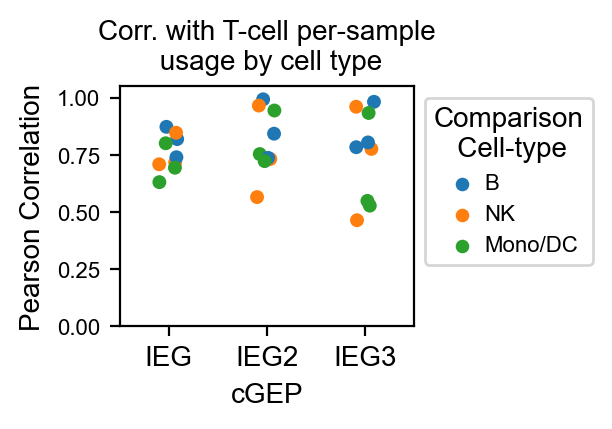

In [44]:
(fig,ax) = plt.subplots(1,1, figsize=(3,2), dpi=200, gridspec_kw={'left':.17, 'right':.66, 'top':.8, 'bottom':.2})
sns.stripplot(x='cGEP', y='R', hue='Lineage', dodge=False, data=allrs_df, ax=ax)
ax.legend(bbox_to_anchor=(1,1), fontsize=8, markerscale=.5, handletextpad=0, title='Comparison\n   Cell-type' )
ax.set_ylabel('Pearson Correlation', fontsize=10)
ax.set_title('Corr. with T-cell per-sample\n usage by cell type', fontsize=10)
ax.set_ylim([0,1.05])
ax.tick_params('y', labelsize=8)

plt.savefig('../../Figures/Components/IEG_CrossSampleCorrelation_Summary.png')
plt.savefig('../../Figures/Components/IEG_CrossSampleCorrelation_Summary.pdf')